In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('crime.csv', encoding='euc-kr')
print(df.head())
print()
print(df.info())
print(df.columns)
print(set(df['범죄대분류']))
print(len(df['범죄대분류'] == '마약범죄'))

  범죄대분류  범죄중분류   서울   부산   대구   인천   광주   대전   울산  세종  ...  경남 밀양  경남 사천  \
0  강력범죄   살인기수   67   20   13   17   11    8   12   2  ...      1      0   
1  강력범죄  살인미수등   96   41   23   34    7   16   11   1  ...      5      5   
2  강력범죄     강도  274  161   60  103   44   64   29   0  ...      1      4   
3  강력범죄     강간  969  383  216  304  216  181  132   3  ...     10     12   
4  강력범죄   유사강간  118   24   21   35   17   14   10   1  ...      1      1   

   경남 양산  경남 진주  경남 창원  경남 통영  제주 서귀포  제주 제주  기타도시  도시이외  
0      2      4      7      2       0     11     7    30  
1      6      0     13      2       1     16     4    44  
2      2     13     26      3       4     29     4    65  
3     35     63     85     11      14     64    18   328  
4      3      1      8      1       1     12     0    33  

[5 rows x 90 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  -------------

In [2]:
count_condition = df['범죄대분류'].apply(lambda x: x == '마약범죄').value_counts().get(True, 0)
print(f"조건을 만족하는 행의 개수: {count_condition}")


조건을 만족하는 행의 개수: 1


### 서울 부산 대구 인천 광주 대전 울산 세종 까지의 강력범죄 발생 건수를 지도에 나타내자

In [25]:
crime_df = df.copy()
crime_by_category = crime_df.groupby('범죄대분류').sum()
crime_by_category = crime_by_category.reset_index()
crime_by_category.head()

selected_columns = ['범죄대분류', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종']
selected_df = crime_df[selected_columns]
selected_df.head()
grouped_by_category = selected_df.groupby('범죄대분류').sum()
grouped_by_category.head()
gangryeok_row = grouped_by_category.loc['강력범죄']
gangryeok_row.head()
gangryeok_row

df_gang = pd.DataFrame(gangryeok_row)
df_gang


,강력범죄
서울,6215
부산,1774
대구,1084
인천,1542
광주,860
대전,698
울산,532
세종,46


In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

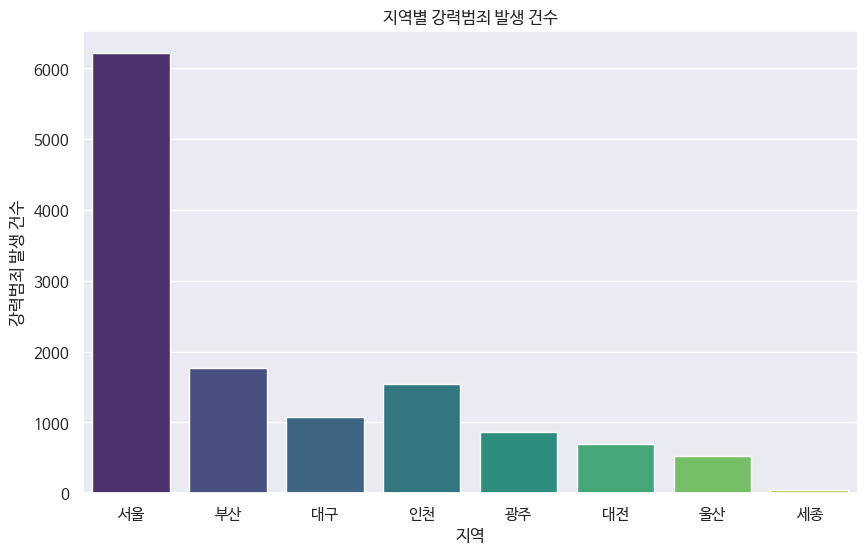

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font='NanumBarunGothic')
plt.rc('font', family='NanumBarunGothic')

# 'index' 컬럼을 DataFrame의 인덱스로 설정
df_gang.reset_index()
# Seaborn을 사용한 barplot 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=df_gang.index, y='강력범죄', data=df_gang, palette='viridis')
plt.title('지역별 강력범죄 발생 건수')
plt.xlabel('지역')
plt.ylabel('강력범죄 발생 건수')
plt.show()

## 기본 지도를 생성하고 지역별로 포인트를 찍어서 강력범죄 발생 건수를 표시한다


In [50]:
import folium
coordinate = {'서울' : (37.56, 126.97),
              '부산' : (34.8799083, 128.7384361),
              '대구' : (35.8714354, 128.601445),
              '인천' : (37.4562557, 126.7052062),
              '광주' : (35.1595454, 126.8526012),
              '대전' : (36.321655, 127.378953),
              '울산' : (35.519301, 129.239078),
              '세종' : (36.5040736, 127.2494855)}
# 기본 지도 생성
map = folium.Map(location=[37.5665, 126.9779],tiles='CartoDB dark_matter', zoom_start=12)

# print(df_gang.index)
for v,c in zip(df_gang.values,df_gang.index):
  latitude, longitude = coordinate[c]
  weight = 1 # (v - df_gang.min()) / (df_gang.max() - df_gang.min())
  # print(weight)
  folium.CircleMarker(
      location = [latitude, longitude],
      radius = 15,
      color = 'red',
      fill = True,
      fill_color = 'red',
      fill_opacity = weight,
      popup=  f'<div style="font-size: 16px; color: blue; font-weight: bold;">{v}</div>',
      auto_open=True  # 자동으로 열리도록 설정

  ).add_to(map)


map.save('city_crime4.html')
map

In [46]:
from folium.plugins import MarkerCluster
# Add  points to the map
mc = MarkerCluster()




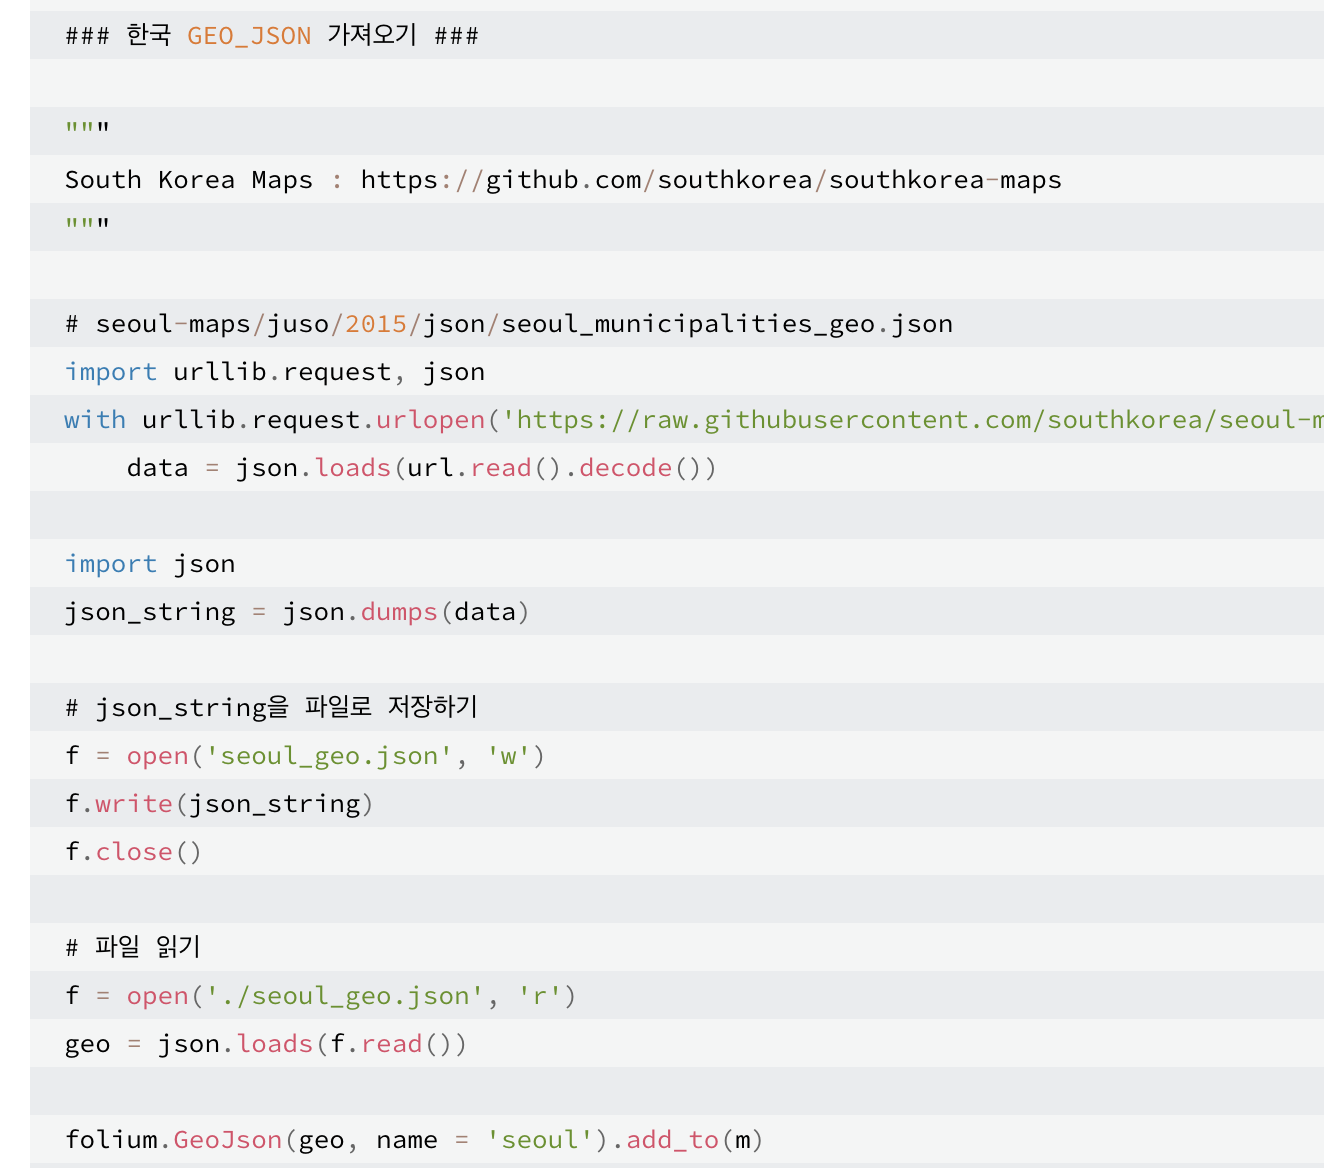